AR(2) Process is given by:
    
    𝑋𝑡 = 𝜙1𝑋𝑡−1 + 𝜙2𝑋𝑡−2 + 𝑍𝑡
    where
    𝑍𝑡 ~ 𝑁𝑜𝑟𝑚𝑎𝑙 (0, 𝜎z^2)

We estimate coefficients of the model by first finding 𝑟1, 𝑟2 using acf() routine, then solving the system of
equations Rx=b:

\begin{equation*}
\begin{pmatrix}
\mathbf{r1} \\
\mathbf{r2}
\end{pmatrix}
=  \begin{pmatrix}
\mathbf{1} & \mathbf{r1} \\
\mathbf{r1} & \mathbf{1}
\end{pmatrix} \begin{pmatrix}
\mathbf{𝜙1} \\
\mathbf{𝜙2}
\end{pmatrix} 
\end{equation*}



In [149]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [245]:
## Read data -> Recruitment Data -> AR(2) process
recruitment_data = pd.read_csv("./Recruitment_data.csv",header=[0])
recruitment_data.columns = (["tmp","date","y"])
recruitment_data = recruitment_data[["date","y"]]
recruitment_data = recruitment_data.set_index(["date"])
recruitment_data.head()

,y
date,
Jan 1950,68.63
Feb 1950,68.63
Mar 1950,68.63
Apr 1950,68.63
May 1950,68.63


In [151]:
## Normalize series
recruitment_data["yhat"] = recruitment_data["y"] - np.mean(recruitment_data["y"])
recruitment_data.head()

,y,yhat
date,,
Jan 1950,68.63,6.367218
Feb 1950,68.63,6.367218
Mar 1950,68.63,6.367218
Apr 1950,68.63,6.367218
May 1950,68.63,6.367218


date
Jan 1950    6.367218
Feb 1950    6.367218
Mar 1950    6.367218
Apr 1950    6.367218
May 1950    6.367218
Name: yhat, dtype: float64


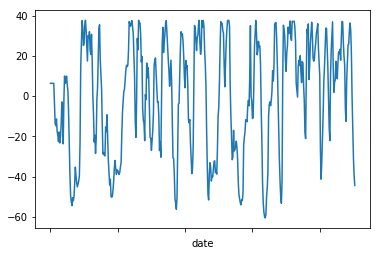

In [101]:
## Convert to Time series
ts = pd.Series(recruitment_data["yhat"], index=recruitment_data.index)
print(ts.head())
ts.plot()

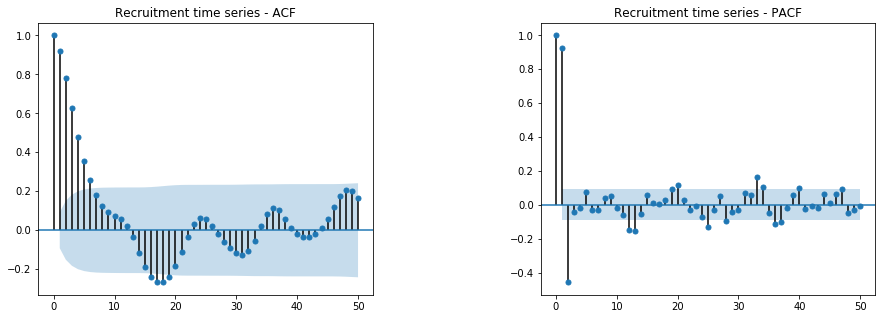

In [103]:
## PLOT operations on original series
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plot_acf(ts, title = "Recruitment time series - ACF",ax=plt.gca(), lags =50)
plt.subplot(122)
plot_pacf(ts,title = "Recruitment time series - PACF",ax=plt.gca(),lags =50)
plt.show()

In [107]:
#Perform Analysis : SOlve # solve(R,b) solves Rx=b, and gives x=R^(-1)b vector
ts_acf = acf(ts)
ts_pacf = pacf(ts)

In [127]:
##  Moving Average variable 
p = 2

## Make R matrix
R = np.ones(shape=[2,2])
for i in range(p):
    for j in range(p):
        if i!=j:
            R[i,j] = ts_acf[abs(i-j)]

## Make B matrix
b = np.array(ts_acf[1:p+1])

phi_hat = np.linalg.solve(R, b)
phi_hat

array([ 1.33158739, -0.4445447 ])

In [141]:
#variance estimation using Yule-Walker Estimator

c = acovf(ts)[0]
var = c*(1-np.sum(phi_hat*ts_acf[1:p+1]))
var

# constant term in the model
phi_0 = np.mean(recruitment_data["y"]) * (1-np.sum(phi_hat))
phi_0

7.033036267085922

In [145]:
print("Constant:", round(phi_0,6)," Coeffcinets:", phi_hat, " and Variance:", round(var,6), '\n')

Constant: 7.033036  Coeffcinets: [ 1.33158739 -0.4445447 ]  and Variance: 94.17131 



In [ ]:
# ------------------------------------------------------- AR(4) -------------------------------------------------------------------------------

In [152]:
# Johnson & Johnson quarterly earnings per share AR(4) with Log and Diff Transformations

In [207]:
## Prepare data
j_j_data = pd.read_csv("./Johnson&Johnson.csv",header=[0])
j_j_data.columns = (["tmp","date","y"])
j_j_data = j_j_data[["date","y"]]
j_j_data = j_j_data.set_index(["date"])
j_j_data["y_log_diff"] = np.log(j_j_data["y"]).diff()
j_j_data["y_log_diff_nrm"] = j_j_data["y_log_diff"] - np.mean(j_j_data["y_log_diff"])
j_j_data = j_j_data.fillna(0)
print(j_j_data.head())

## convert to time series
ts = pd.Series(j_j_data["y_log_diff_nrm"], index=j_j_data.index)


             y  y_log_diff  y_log_diff_nrm
date                                      
Jan 1960  0.71    0.000000        0.000000
Apr 1960  0.63   -0.119545       -0.153212
Jul 1960  0.85    0.299517        0.265850
Oct 1960  0.44   -0.658462       -0.692129
Jan 1961  0.61    0.326684        0.293017


/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


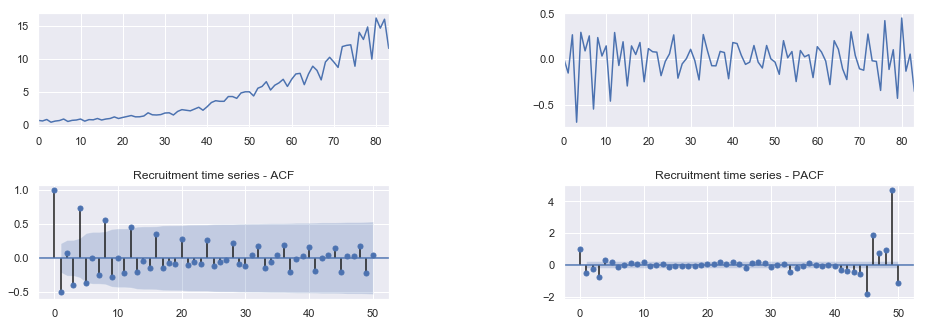

In [233]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
## original
sns.set(rc={'figure.figsize':(15.7,5.27)})
sns.tsplot(data=j_j_data.y, ax = ax1)

## after transformation ##
sns.tsplot(data=ts, ax = ax2)

## ACF and PACF
plot_acf(ts, title = "Recruitment time series - ACF",ax=ax3, lags =50)
plot_pacf(ts,title = "Recruitment time series - PACF",ax=ax4,lags =50)

plt.show()


In [243]:
#Perform Analysis : SOlve # solve(R,b) solves Rx=b, and gives x=R^(-1)b vector
##  Moving Average variable 

p = 4

ts_acf = acf(ts)
ts_pacf = pacf(ts)

## Make R matrix
R = np.ones(shape=[4,4])
for i in range(p):
    for j in range(p):
        if i!=j:
            R[i,j] = ts_acf[abs(i-j)]

## Make B matrix
b = np.array(ts_acf[1:p+1])

phi_hat = np.linalg.solve(R, b)
#variance estimation using Yule-Walker Estimator

c = acovf(ts)[0]
var = c*(1-np.sum(phi_hat*ts_acf[1:p+1]))

# constant term in the model
phi_0 = np.mean(j_j_data["y_log_diff"] * (1-np.sum(phi_hat)))

print("Constant:", round(phi_0,6)," Coeffcinets:", phi_hat, " and Variance:", round(var,6), '\n')

Constant: 0.078831  Coeffcinets: [-0.62934924 -0.51715263 -0.48833738  0.26512665]  and Variance: 0.014023 

